In [ ]:
# PyMCのインストール (Condaを使う場合)

!conda create -c conda-forge -n pymc_env numpyro pymc
!conda activate pymc_env

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams["font.size"] = 15
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

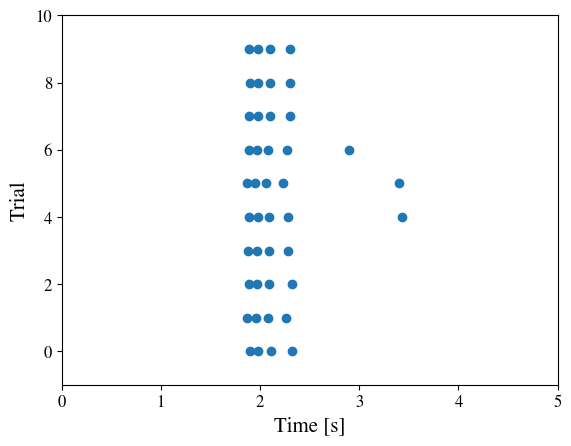

In [2]:
# Data visualization
# ------------------

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('train.csv')

plt.plot(df['Time'], df['Trial'], 'o')
plt.xlabel('Time [s]')
plt.ylabel('Trial')
plt.xlim(0, 5)
plt.ylim(-1, 10)
plt.show()

In [7]:
# Defiining the model
# -------------------

import numpy as np
import pymc as pm

dt = 1e-3                 # unit time is 1 [ms]
time = df['Time'].values  # firing times
n_trial = len(np.unique(df['Trial'])) # number of trials

n_firing = [len(time[(time > t - 2e-4) & (time < t + 2e-4)]) > 0 for t in np.linspace(0, 5, 5001)]

with pm.Model() as model:
    sigma = pm.HalfFlat('sigma')
    x = pm.GaussianRandomWalk('x', mu=0, sigma=1, shape=5001, init_dist=pm.HalfNormal.dist(1))
    r = pm.Deterministic('r', pm.math.exp(sigma*x))
    pm.Poisson('likelihood', mu=r*dt, observed=n_firing)

In [8]:
# Parameter estimation by MCMC
# ----------------------------

from pymc.sampling.jax import sample_numpyro_nuts

with model:
    trace = sample_numpyro_nuts(1000)

Compiling...
Compilation time =  0:00:02.240353
Sampling...


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

Sampling time =  0:01:19.401257
Transforming variables...
Transformation time =  0:00:00.141754


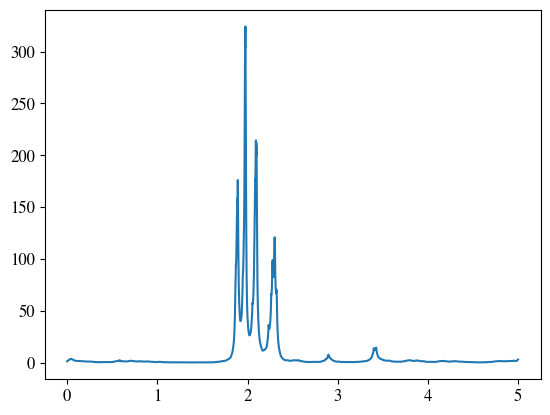

In [5]:
# Checking the results
# --------------------

import matplotlib.pyplot as plt

firing_rate = trace.posterior['lam'].mean(axis=0).mean(axis=0) # averaging over samples and trials
time = np.linspace(0, 5, 5001)
plt.plot(time, firing_rate)

In [ ]:
# References
# ----------

# [1] https://www.pymc.io/projects/docs/en/stable/learn/core_notebooks/pymc_overview.html
# [2] https://www.pymc.io/projects/docs/en/stable/api/distributions/generated/pymc.GaussianRandomWalk.html